In [1]:
import numpy as np
from SVM import SVM
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from sklearn.metrics import matthews_corrcoef as MCC

In [2]:
XG, YG = make_classification(n_samples=2000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1,scale=100)

In [3]:
mean=np.mean(XG)
stdev=np.sqrt(np.var(XG))

XG = (XG-mean)/stdev

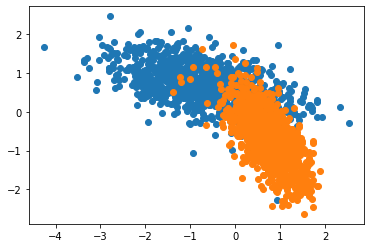

In [4]:
for class_value in range(2):
    row_ix = np.where(YG == class_value)
    plt.scatter(XG[row_ix, 0], XG[row_ix, 1])
plt.show()

In [5]:
subIn=np.argwhere(YG==1)
subIn=subIn.flatten()
X_sub=XG[subIn]

#X_sub=X_sub[:len(X_sub)>>1]  # using half of class 1 for svm 

print(XG.shape,subIn[:-1].shape,X_sub.shape)

(2000, 2) (1000,) (1001, 2)


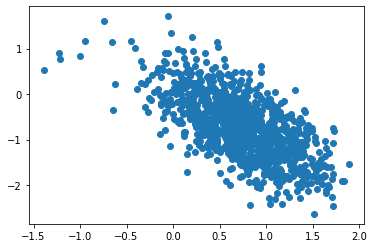

In [6]:
plt.scatter(X_sub[:,0], X_sub[:,1])
plt.show()

# ON USING LINEAR KERNEL

In [7]:
#kernel_stdev=None will result in the use of linear kernel
kernel_stdev=None

In [8]:
svm=SVM(v1=0.0001, v2=0.09, epsilon=2/3, iteration=10000 ,kernel_stdev=None) 

0.005872447195013471 9.9880193359672
On start


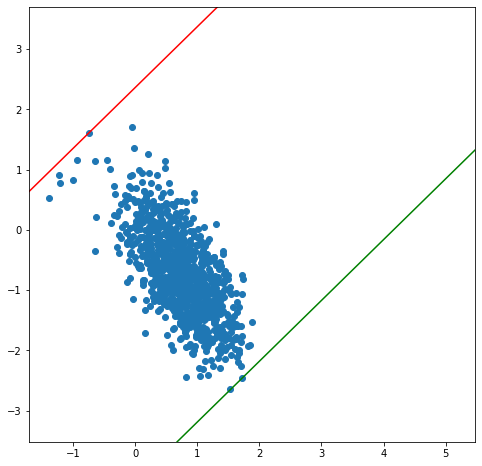

{'KKT voilators count': 999, 'Maximisation Function Value': -13128918.868133727}
At end


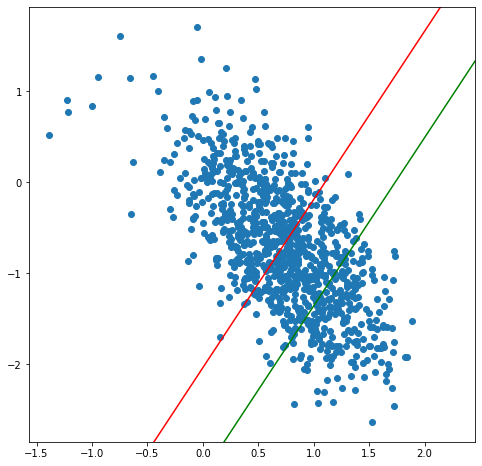

{'KKT voilators count': 462, 'Maximisation Function Value': -2286757.275627856}
{'KKT voilators count': 462, 'Maximisation Function Value': -2286757.275627856}


In [9]:
k=svm.fit(X_sub)
print(k)

In [10]:
 if kernel_stdev is None:
    w=svm.getW()
    print(w,svm.p1,svm.p2)

[ 1881.36872864 -1016.84131415] 2071.863724733932 3261.4367976582303


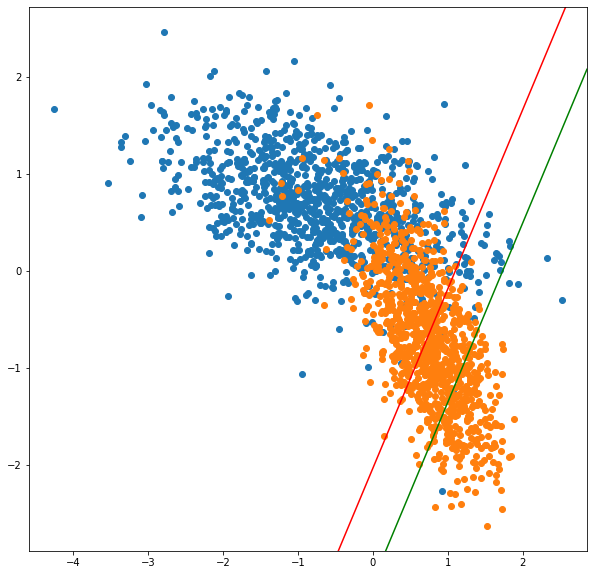

In [11]:
plt.figure(figsize=(10, 10))
for class_value in range(2):
    row_ix = np.where(YG == class_value)
    plt.scatter(XG[row_ix, 0], XG[row_ix, 1])

if kernel_stdev is None:
    plt.axline(((svm.p1-w[1])/w[0], 1), (1, (svm.p1-w[0])/w[1]),c='r')
    plt.axline(((svm.p2-w[1])/w[0], 1), (1, (svm.p2-w[0])/w[1]),c='g')
plt.show()

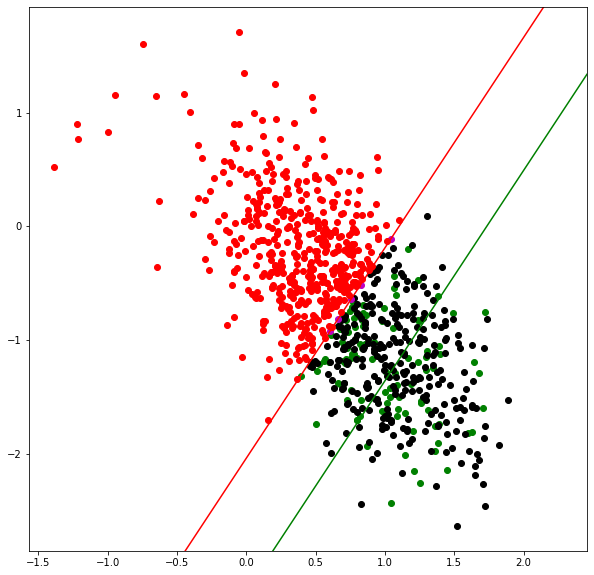

In [12]:
plt.figure(figsize=(10, 10))

row_ix = np.where(svm.gamma == -1*svm.highPrime)
plt.scatter(X_sub[row_ix, 0], X_sub[row_ix, 1],c='g')

row_ix = np.where((svm.gamma > -1*svm.highPrime) & (svm.gamma < 0))
plt.scatter(X_sub[row_ix, 0], X_sub[row_ix, 1],c='k')

row_ix = np.where(svm.gamma == 0)
plt.scatter(X_sub[row_ix, 0], X_sub[row_ix, 1],c='b')

row_ix = np.where((svm.gamma>0) & (svm.gamma<svm.high))
plt.scatter(X_sub[row_ix, 0], X_sub[row_ix, 1],c='m')

row_ix = np.where(svm.gamma == svm.high)
plt.scatter(X_sub[row_ix, 0], X_sub[row_ix, 1],c='r')

if kernel_stdev is None:
    plt.axline(((svm.p1-w[1])/w[0], 1), (1, (svm.p1-w[0])/w[1]),c='r')
    plt.axline(((svm.p2-w[1])/w[0], 1), (1, (svm.p2-w[0])/w[1]),c='g')

In [13]:
predictions =svm.predict(XG)

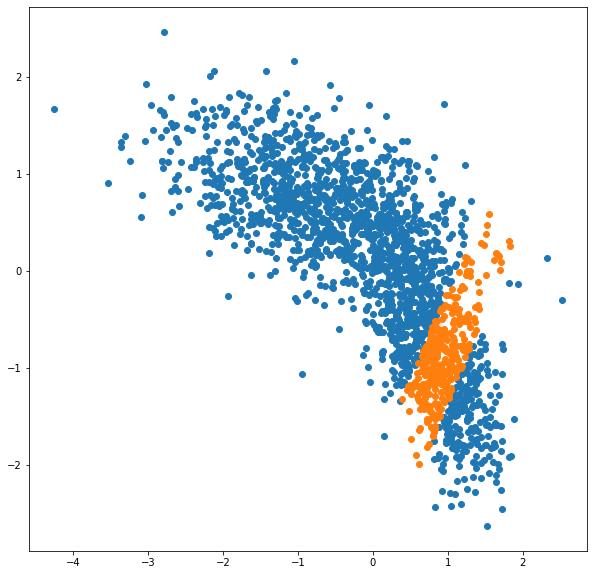

In [14]:
plt.figure(figsize=(10, 10))

for i in range(2):
    row_ix = np.where(predictions == i)
    plt.scatter(XG[row_ix, 0], XG[row_ix, 1])


In [15]:
print(MCC(YG,predictions))

0.3487541461157786


# ON USING RBF 

In [16]:
#kernel_stdev=None will result in the use of linear kernel
kernel_stdev=1

In [17]:
svm=SVM(v1=0.0001, v2=0.09, epsilon=2/3, iteration=10000 ,kernel_stdev=kernel_stdev) 

In [18]:
k=svm.fit(X_sub)
print(k)

0.00995814592916041 9.979064052945311
On start
{'KKT voilators count': 999, 'Maximisation Function Value': -7935648.981661456}
At end
{'KKT voilators count': 443, 'Maximisation Function Value': -6114041.858570152}
{'KKT voilators count': 443, 'Maximisation Function Value': -6114041.858570152}


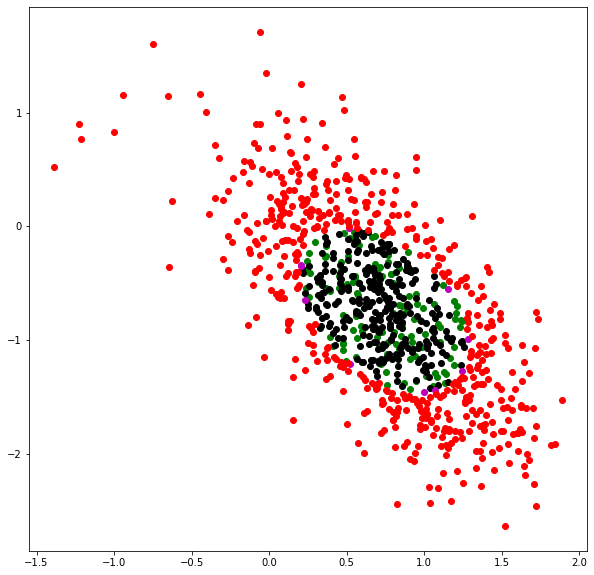

In [19]:
plt.figure(figsize=(10, 10))

row_ix = np.where(svm.gamma == -1*svm.highPrime)
plt.scatter(X_sub[row_ix, 0], X_sub[row_ix, 1],c='g')

row_ix = np.where((svm.gamma > -1*svm.highPrime) & (svm.gamma < 0))
plt.scatter(X_sub[row_ix, 0], X_sub[row_ix, 1],c='k')

row_ix = np.where(svm.gamma == 0)
plt.scatter(X_sub[row_ix, 0], X_sub[row_ix, 1],c='b')

row_ix = np.where((svm.gamma>0) & (svm.gamma<svm.high))
plt.scatter(X_sub[row_ix, 0], X_sub[row_ix, 1],c='m')

row_ix = np.where(svm.gamma == svm.high)
plt.scatter(X_sub[row_ix, 0], X_sub[row_ix, 1],c='r')

In [20]:
predictions =svm.predict(XG)

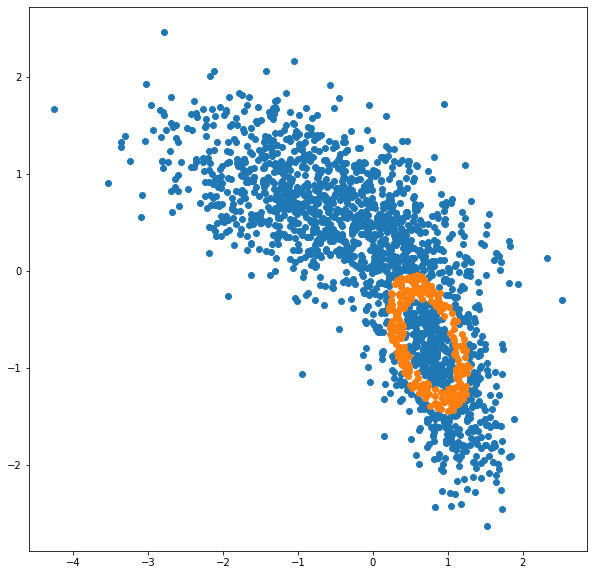

In [21]:
plt.figure(figsize=(10, 10))

for i in range(2):
    row_ix = np.where(predictions == i)
    plt.scatter(XG[row_ix, 0], XG[row_ix, 1])


In [22]:
print(MCC(YG,predictions))

0.3463809580332923
